In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
example = 'laplace'
script = 'generate_example'

In [3]:
# import os
# matlab_path = "/Applications/MATLAB_R2023a.app/bin/matlab"
# examplematlab = "\'"+example+"\'"
# matlabcmd = f"{matlab_path} -nodisplay -nosplash -nodesktop -r \"{script}({examplematlab}); exit;\" | tail -n +11"
# with open("temp.sh", 'w') as f:
#     f.write(matlabcmd)
#     f.close()
# os.system(f"bash temp.sh")
# os.remove("temp.sh")

In [4]:
data = DataProcessor("datasets/laplace/data.mat")
data.generateDataset(trainRatio = 0.95, batch_size = 1024)

Metal device set to: Apple M1 Pro


In [5]:
model = GreenNN()
model.build()

Using tensorflow 2.9.0


In [6]:
lossHistory = model.train(data, epochs = 2000)

Loss at epoch 1: Training = 7.653E-01, Validation = 1.660E+01
Loss at epoch 2: Training = 1.406E+01, Validation = 3.892E+00
Loss at epoch 3: Training = 1.768E+00, Validation = 1.023E+00
Loss at epoch 4: Training = 8.251E-01, Validation = 1.297E+00
Loss at epoch 5: Training = 1.757E+00, Validation = 1.379E+00
Loss at epoch 6: Training = 1.954E+00, Validation = 1.124E+00
Loss at epoch 7: Training = 1.486E+00, Validation = 1.100E+00
Loss at epoch 8: Training = 9.486E-01, Validation = 1.414E+00
Loss at epoch 9: Training = 6.863E-01, Validation = 1.834E+00
Loss at epoch 10: Training = 8.470E-01, Validation = 1.943E+00
Loss at epoch 11: Training = 1.136E+00, Validation = 1.666E+00
Loss at epoch 12: Training = 1.127E+00, Validation = 1.301E+00
Loss at epoch 13: Training = 8.575E-01, Validation = 1.036E+00
Loss at epoch 14: Training = 6.610E-01, Validation = 9.277E-01
Loss at epoch 15: Training = 7.004E-01, Validation = 9.218E-01
Loss at epoch 16: Training = 8.466E-01, Validation = 9.294E-01
L

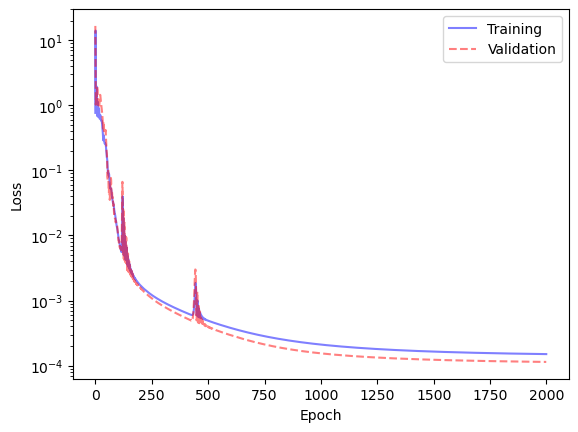

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

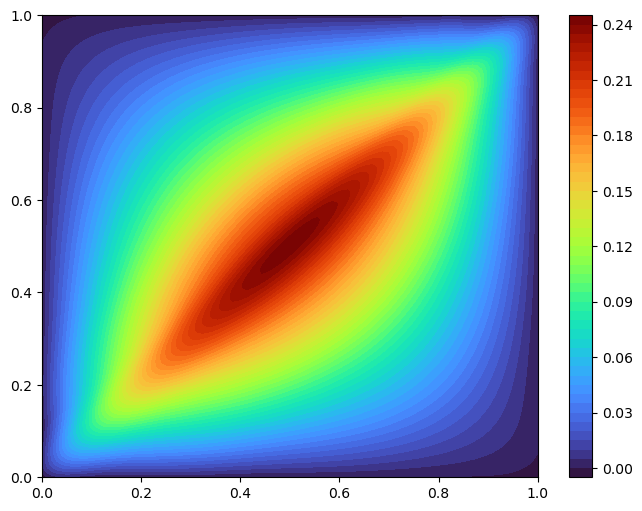

In [8]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

fig = plt.figure(figsize = (8,6))
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

In [9]:
model.saveModels('savedModels/laplace')

INFO:tensorflow:Assets written to: savedModels/laplace/G/assets
INFO:tensorflow:Assets written to: savedModels/laplace/N/assets
